In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [56]:
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("Fraud.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### 1.Data cleaning including missing values, outliers and multi-collinearity. 


In [6]:
# checking Null Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.shape

(6362620, 11)

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df_sample=df.sample(frac=0.5)

In [10]:
df_sample.shape

(3181310, 11)

#### Let's Check the variable Type

In [11]:
df_sample.info()
for i in df_sample.columns:
    print(f"The unique values for {i} column: \n",df[i].unique())
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181310 entries, 4888867 to 249679
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 291.3+ MB
The unique values for step column: 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 10

In [12]:
df_newsample=df_sample

#### Let's Check the correlation between variables

<AxesSubplot:>

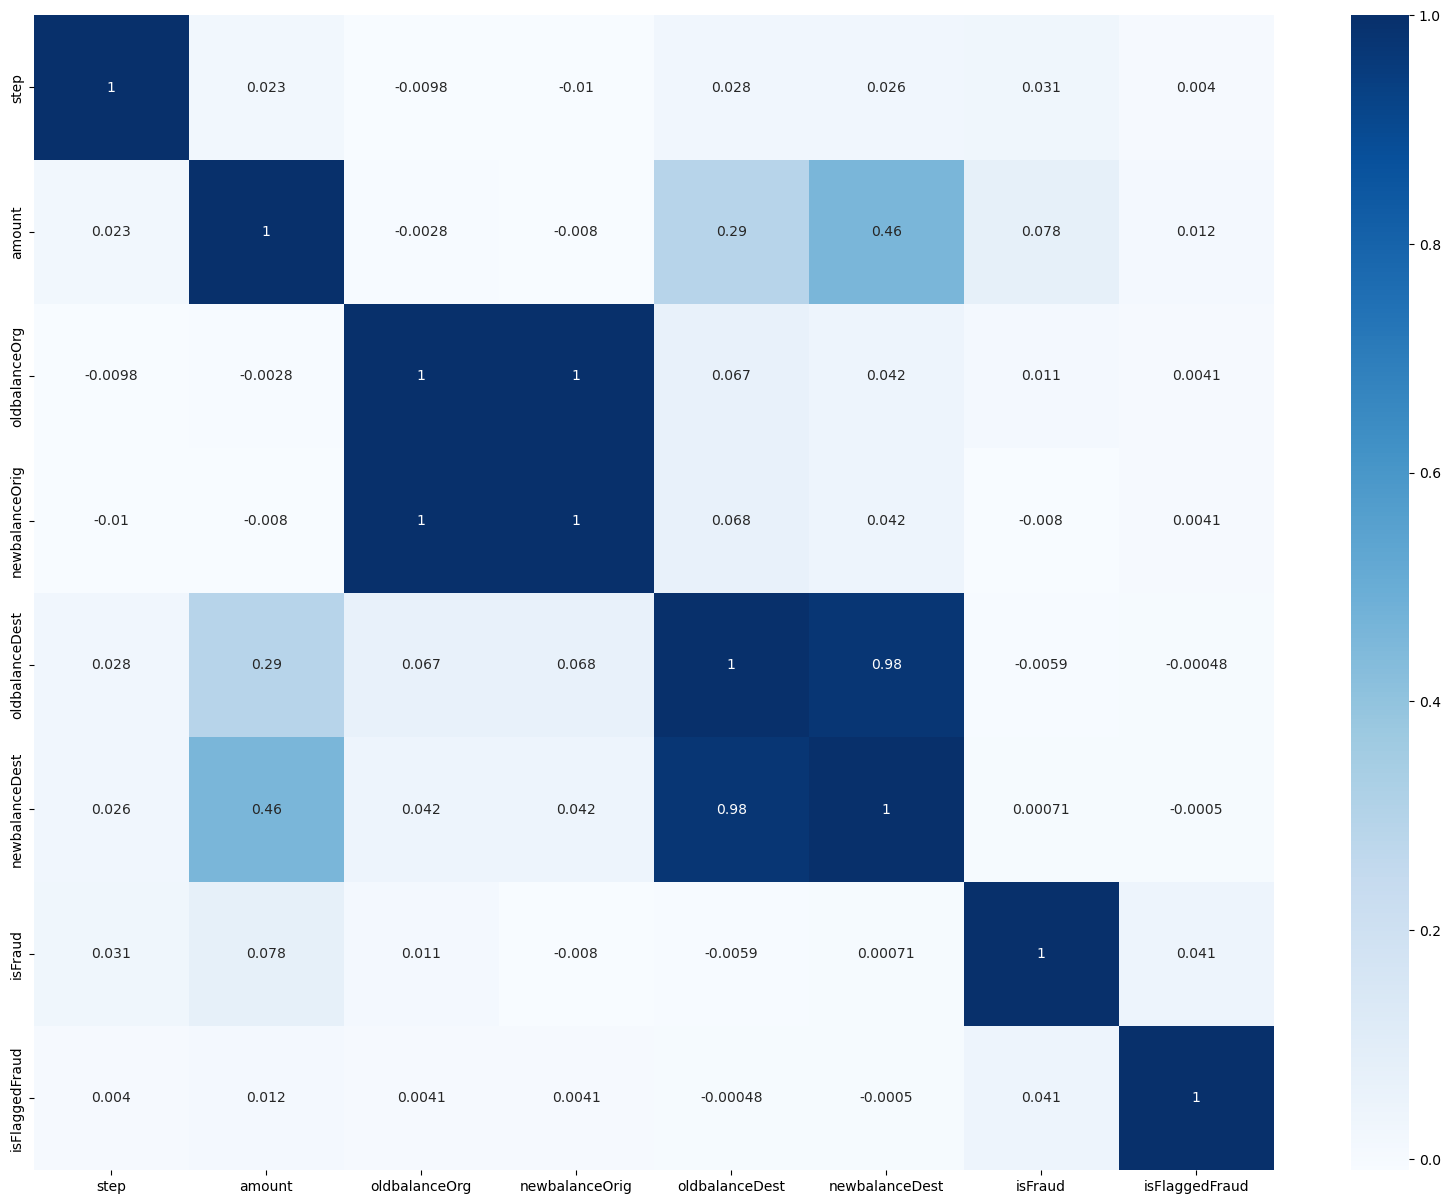

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df_sample.corr(),cbar=True,annot=True,cmap="Blues")

In [14]:
df_sample.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

#### Number of Legit and Fraud Transactions

In [15]:
legit=len(df_sample[df_sample.isFraud==0])
fraud=len(df_sample[df_sample.isFraud==1])
percent_legit=(legit/(fraud+legit))*100
percent_fraud=(fraud/(fraud+legit))*100

In [16]:
print("Num of Legit transactions:",legit)
print("Num of Fraud transactions:",fraud)
print("Percent of Legit transactions:{:.4f}%".format(percent_legit))
print("Percent of Frauf transactions:{:.4f}%".format(percent_fraud))

Num of Legit transactions: 3177223
Num of Fraud transactions: 4087
Percent of Legit transactions:99.8715%
Percent of Frauf transactions:0.1285%


<function matplotlib.pyplot.show(close=None, block=None)>

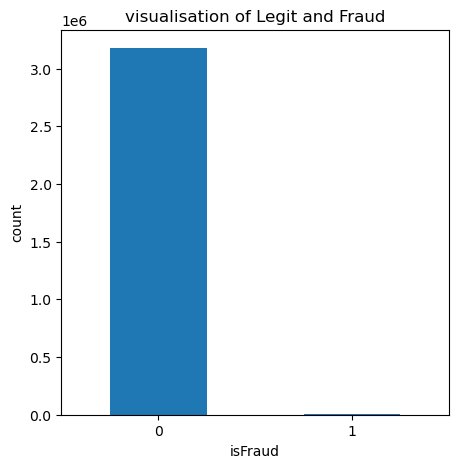

In [17]:
plt.figure(figsize=(5,5))
labels=["Legit","Fraud"]
count=df_sample.value_counts(df_sample.isFraud,sort=True)
count.plot(kind="bar",rot=0)
plt.title("visualisation of Legit and Fraud")
plt.ylabel("count")
plt.show

#### Multicolinearity

In [18]:
#Checking for attribute of datatypes
dtlist=df_newsample.select_dtypes(include="object").columns
dtlist

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

So there are 3 datatypes we have.To check multicolinearity we need to encode them

In [19]:
#for label encoding
le=LabelEncoder()
for i in dtlist:
    df_newsample[i]=le.fit_transform(df_newsample[i].astype(str))
df_newsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181310 entries, 4888867 to 249679
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 254.9 MB


In [20]:
df_newsample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4888867,349,1,61392.59,249210,0.00,0.00,310211,341965.49,403358.08,0,0
1916450,166,1,315006.46,2356397,55261.56,0.00,11402,3982452.89,4297459.34,0,0
1554924,154,3,17721.70,1938134,51911.00,34189.30,1013245,0.00,0.00,0,0
1635373,157,3,313.16,127583,64664.00,64350.84,1537995,0.00,0.00,0,0
5876207,403,3,25969.02,545865,103376.00,77406.98,1038106,0.00,0.00,0,0


In [21]:
def calc_vif(df_sample):
    vif=pd.DataFrame()
    vif["variables"]=df_sample.columns
    vif["VIF"]=[variance_inflation_factor(df_sample.values,i) for i in range(df_sample.shape[1])]
    return(vif)
calc_vif(df_newsample)

,variables,VIF
0,step,2.819031
1,type,4.682455
2,amount,4.196114
3,nameOrig,2.790928
4,oldbalanceOrg,569.936591
5,newbalanceOrig,575.911149
6,nameDest,3.957447
7,oldbalanceDest,73.135348
8,newbalanceDest,84.872561
9,isFraud,1.197749


Here we can see that "oldbalanceOrg" and "newbalanceOrig" have high vif value,thus they are highly correlated.Also "oldbalanceDest" and "newbalanceDest" and nameDest and nameOrig is also connected.So combine these pairs of collinear attributes and drop the individually.

In [22]:
df_newsample["Actual_amount_orig"]=df_newsample.apply(lambda x: x["oldbalanceOrg"]-x["newbalanceOrig"],axis=1)

In [23]:
df_newsample["Actual_amount_dest"]=df_newsample.apply(lambda x: x["oldbalanceDest"]-x["newbalanceDest"],axis=1)

In [24]:
df_newsample["TransactionPath"]=df_newsample.apply(lambda x: x["nameOrig"]+x["nameDest"],axis=1)

In [25]:
#For dropping columns
df_newsample=df_newsample.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","step","nameOrig","nameDest"],axis=1)

In [26]:
calc_vif(df_newsample)

,variables,VIF
0,type,2.817546
1,amount,3.869286
2,isFraud,1.187300
3,isFlaggedFraud,1.002269
4,Actual_amount_orig,1.312022
5,Actual_amount_dest,3.806395
6,TransactionPath,2.806926


<AxesSubplot:>

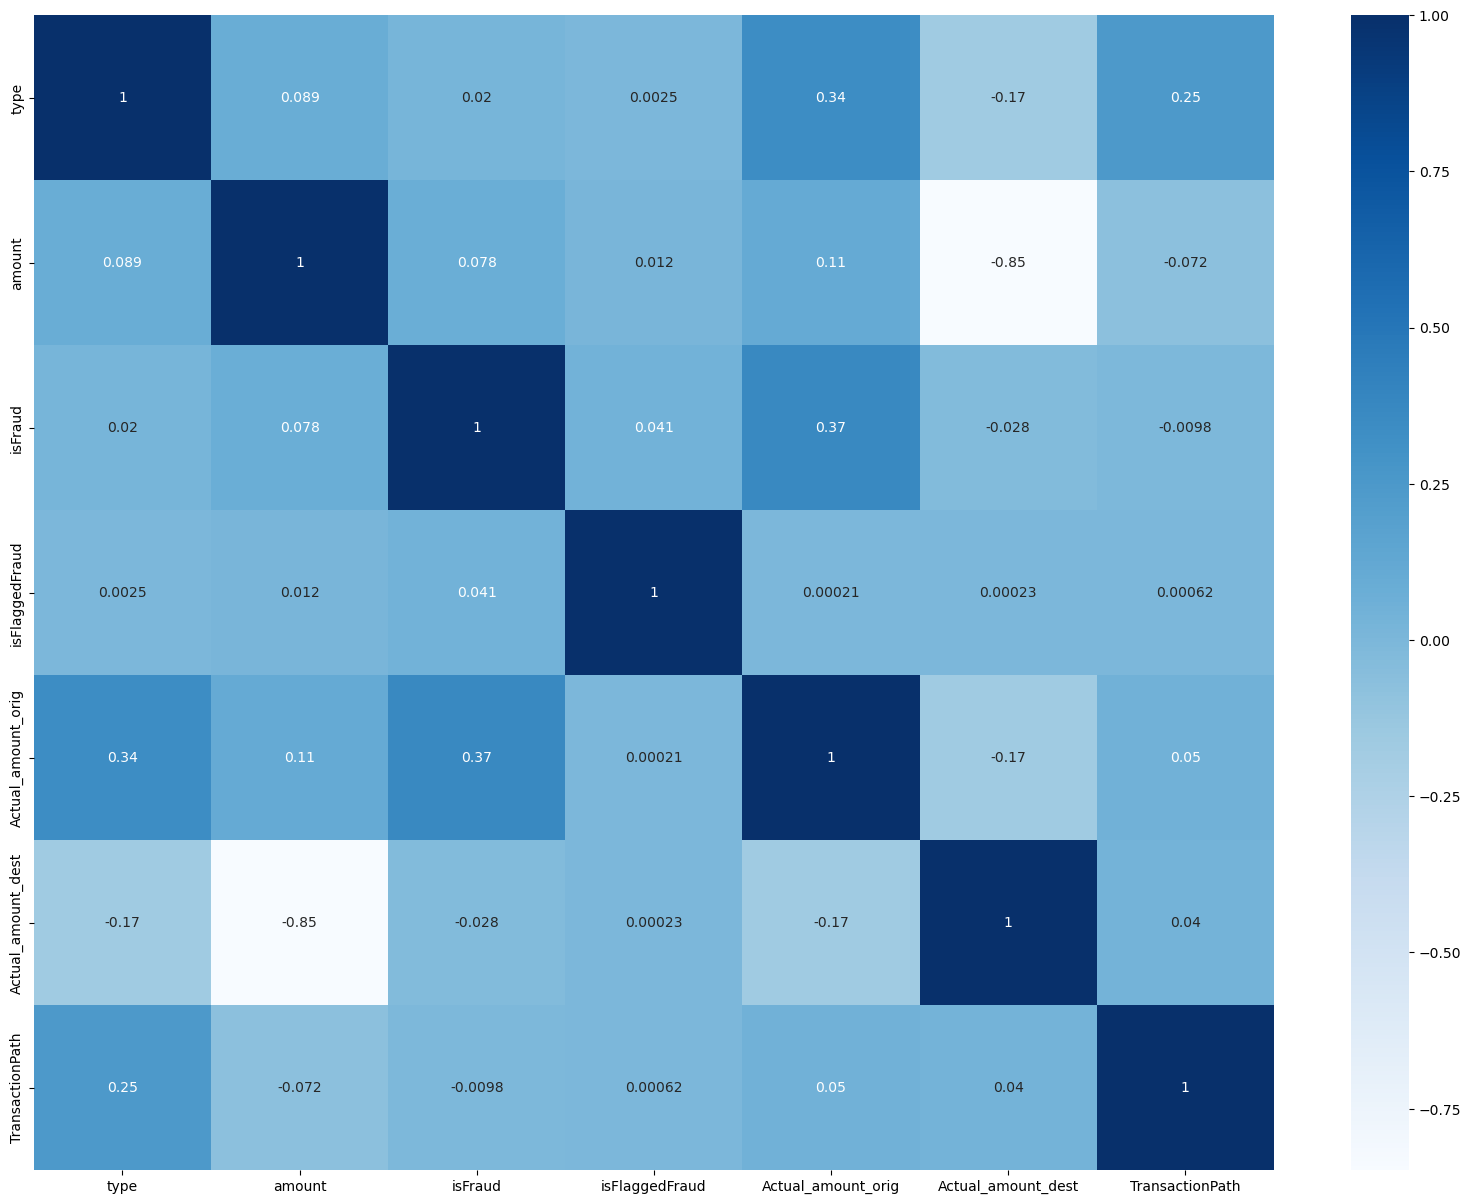

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df_newsample.corr(),cbar=True,annot=True,cmap="Blues")

### 3. How did you select variables to be included in the model?

    Using VIF values and correlation we need to check whether there any two elements are highly correlated to each other and then drop the one which is less correlated to isFraud.

### 2.Describe your fraud detection model in elaboration. 

#### Model Building

In [28]:
# Perform Scaling
scaler=StandardScaler()
df_newsample["normalizedAmount"]=scaler.fit_transform(df_sample["amount"].values.reshape(-1,1))
df_newsample.drop(["amount"],inplace=True,axis=1)
Y=df_newsample["isFraud"]
X=df_newsample.drop(["isFraud"],axis=1)

### Train_Test Split

In [29]:
#Split the data
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.33,random_state=4,stratify=Y)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (2131477, 6)
Shape of X_test: (1049833, 6)


In [52]:
Y_train

1744224    0
1528984    0
3123589    0
5027074    0
3738830    0
          ..
3459289    0
4965880    0
5241634    0
5019037    0
4483916    0
Name: isFraud, Length: 2131477, dtype: int64

#### Feature Engineering
    
    This process will transform raw data into useful features that help us to understand our model and increase its predictive power

In [30]:
# Check the data types of X_train
X_train.dtypes

type                    int32
isFlaggedFraud          int64
Actual_amount_orig    float64
Actual_amount_dest    float64
TransactionPath       float64
normalizedAmount      float64
dtype: object

All variables are ordinal categorical datatype

In [31]:
X_train.head()

,type,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath,normalizedAmount
1744224,0,0,-146070.61,146070.61,628459.0,-0.056215
1528984,0,0,-151052.36,151052.36,1590380.0,-0.047992
3123589,3,0,3340.49,0.00,3947879.0,-0.291829
5027074,1,0,0.00,-675.51,2755094.0,-0.296228
3738830,3,0,5377.69,0.00,1278970.0,-0.288466


In [32]:
X_test.dtypes

type                    int32
isFlaggedFraud          int64
Actual_amount_orig    float64
Actual_amount_dest    float64
TransactionPath       float64
normalizedAmount      float64
dtype: object

In [33]:
X_test.head()

,type,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath,normalizedAmount
3087512,1,0,42135.47,-42135.47,3466579.0,-0.227788
806762,3,0,0.00,0.00,3310526.0,-0.287507
824914,0,0,-201794.05,201794.05,1171332.0,0.035771
6100842,1,0,0.00,-212256.80,1391483.0,0.053042
1307009,0,0,-83184.23,83184.23,2377063.0,-0.160026


In [34]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
import category_encoders as ce

In [36]:
X_train.columns

Index(['type', 'isFlaggedFraud', 'Actual_amount_orig', 'Actual_amount_dest',
       'TransactionPath', 'normalizedAmount'],
      dtype='object')

In [37]:
encoder=ce.OrdinalEncoder(cols=['type', 'isFlaggedFraud', 'Actual_amount_orig', 'Actual_amount_dest','TransactionPath', 'normalizedAmount'])

In [38]:
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [39]:
X_train.head()

,type,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath,normalizedAmount
1744224,1,1,1,1,1,1
1528984,1,1,2,2,2,2
3123589,2,1,3,3,3,3
5027074,3,1,4,4,4,4
3738830,2,1,5,3,5,5


### 4. Demonstrate the performance of the model by using best set of tools.

### Model Selection Using Voting Classifier


In [89]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [88]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model3=DecisionTreeClassifier()

voting_cl=VotingClassifier(estimators=[("lr",model1),("rf",model2),("dtm",model3)],voting="hard")

In [42]:
voting_cl.fit(X_train,Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dtm', DecisionTreeClassifier())])

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [45]:
voting_pred=voting_cl.predict(X_test)
accuracy=accuracy_score(Y_test,voting_pred)

In [46]:
accuracy

0.9737234398232861

### Model Evaluation

In [54]:
# Voting Classifier using Cross_validation
for clf, label in zip([model1,model2,model3],['lr','rf','dtm']):
    scores=cross_val_score(clf,X_train,Y_train,scoring="accuracy",cv=3)
    print("Accuracy:",(scores.mean(),label))

Accuracy: (0.9987154447364283, 'lr')
Accuracy: (0.9979859032449189, 'rf')
Accuracy: (0.9938085216118316, 'dtm')


In [59]:
#Solo Logistic Regression Accuracy
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
lrc.fit(X_train,Y_train)
lrc_pred=lrc.predict(X_test)
accuracy=accuracy_score(Y_test,lrc_pred)
accuracy

0.9987150337244114

In [57]:
#Solo Random_Forest Accuracy
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
rfc_pred=rfc.predict(X_test)
accuracy=accuracy_score(Y_test,rfc_pred)
accuracy

0.9706543802680998

In [62]:
#Solo Decisiom_Tree Accuracy
from sklearn.tree import DecisionTreeClassifier
dtc=RandomForestClassifier()
dtc.fit(X_train,Y_train)
dtc_pred=dtc.predict(X_test)
accuracy=accuracy_score(Y_test,dtc_pred)
accuracy

0.9733681452192873

From above we can see only Logic Regression Shows more accuracy.So we can consider only LogicRegression.

### Confusion Matrix

In [81]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier 

In [77]:
lrf=model1.fit(X_train,Y_train)

In [78]:
Y_pred=model1.predict(X_test)

In [79]:
print("accuracy",metrics.accuracy_score(Y_test,Y_pred))

accuracy 0.9987150337244114


E:\python\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


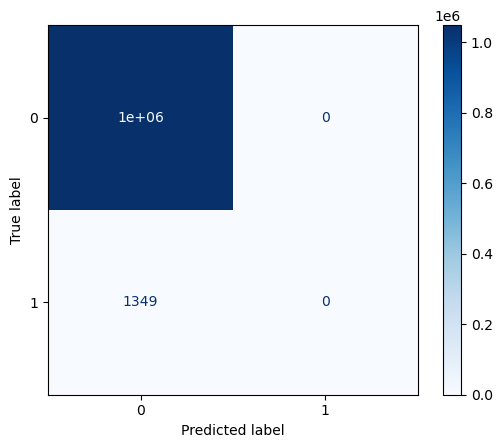

In [83]:
plot_confusion_matrix(lrf,X_test,Y_test,cmap=plt.cm.Blues)

In [100]:
lrclf=LogisticRegression(max_iter=100,random_state=1)
Baggingclf=BaggingClassifier(base_estimator=lrclf,n_estimators=501,random_state=1)

In [101]:
Baggingclf=Baggingclf.fit(X_train,Y_train)
Y_trainpredict=Baggingclf.predict(X_train)
Y_testpredict=Baggingclf.predict(X_test)
bag_train=accuracy_score(Y_train,Y_trainpredict)
bag_test=accuracy_score(Y_test,Y_testpredict)
print("Baagging train/test accuracies %.3f/%.3f"% (bag_train,bag_test))

Baagging train/test accuracies 0.999/0.964


In [103]:
print(classification_report(Y_test,Y_testpredict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1048484
           1       0.00      0.00      0.00      1349

    accuracy                           0.96   1049833
   macro avg       0.50      0.48      0.49   1049833
weighted avg       1.00      0.96      0.98   1049833



### 5. What are the key factors that predict fraudulent customer? 

    1.Check the name of organisation before transaction of money is legit or not
    2.Check the source of request is secured or not
    3.Check the history of vendors

### 6.Do these factors make sense? If yes, How? If not, How not? 

    1.Ask more questions about the organisation and the details of person who is reporting
    2.Double check the source of request with organization's relavant Staff
    3. Keep the details of account securly
  

### 7. What kind of prevention should be adopted while company update its infrastructure?

    1.Use secured connection while browsing
    2.Keep devices which are using for transaction are security updated
    3.Ignore unwanted calls and Mails
    4.Use secured app
    5.Double check with relavant organisation before transction

    

### 8.Assuming these actions have been implemented, how would you determine if they work?

    1.Keep the paid log updated
    2.Frequent checking of account statement
    